# Feature Effect Evaluation

<script>
    document.querySelector('head').innerHTML += '<style>.slides { zoom: 0.975 !important; }</style>';
</script>

<style>
/* Ensure the entire cell and its output take full width */
.reveal .slides > section .cell {
    width: 90% !important;
    margin: 0 auto;
}

.reveal .slides > section .output {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
    margin: 0 auto;
}

/* Optional: Adjust the slide width if necessary */
.reveal .slides {
    width: 90% !important;
    max-width: 90% !important;
    height: 90% !important;
    max-height: 90% !important;
}


</style>

In [1]:
config_file = "../config_sim_all-models-5_theoretical_20240420.ini"
data_str = "20240420"  # e.g. "20240413"

# set up of example
sim_no = 1
n_train = 1000
noise_sd = 0.1

In [2]:
from configparser import ConfigParser
from joblib import load
import pandas as pd
from IPython.display import Markdown as md

from feature_effect_empirical_analysis.plotting.plots import boxplot_feature_effect_results, plot_effect_comparison
from feature_effect_empirical_analysis.data_generation import generate_data, Groundtruth

In [3]:
config = ConfigParser()
config.read(config_file)

['../config_sim_all-models-5_theoretical_20240420.ini']

## PDP

### Error of Model-PD compared to groundtruth-PD

In [4]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("pdp_results", f"sqlite:///..{effects_results_storage}")
df

,index,model_id,model,simulation,n_train,noise_sd,metric,x_1,x_2,x_3,x_4,x_5
0,0,RandomForestRegressor_20240420_1_1000_0.1,RandomForestRegressor,1,1000,0.1,mean_squared_error,0.180076,0.217016,0.670829,0.110735,0.089038
1,0,XGBRegressor_20240420_1_1000_0.1,XGBRegressor,1,1000,0.1,mean_squared_error,0.033126,0.037456,0.026116,0.017440,0.006373
2,0,DecisionTreeRegressor_20240420_1_1000_0.1,DecisionTreeRegressor,1,1000,0.1,mean_squared_error,0.196085,0.198124,0.788986,0.159278,0.092678
3,0,SVR_20240420_1_1000_0.1,SVR,1,1000,0.1,mean_squared_error,0.015542,0.023117,0.007918,0.000040,0.000365
4,0,ElasticNet_20240420_1_1000_0.1,ElasticNet,1,1000,0.1,mean_squared_error,0.972314,1.002115,2.296801,0.000887,0.001069
5,0,GAM_20240420_1_1000_0.1,GAM,1,1000,0.1,mean_squared_error,0.016391,0.021993,0.007518,0.000297,0.000313
6,0,RandomForestRegressor_20240420_1_1000_0.5,RandomForestRegressor,1,1000,0.5,mean_squared_error,0.183664,0.219501,0.639930,0.101102,0.095004
7,0,XGBRegressor_20240420_1_1000_0.5,XGBRegressor,1,1000,0.5,mean_squared_error,0.038568,0.042233,0.031817,0.021237,0.014175
8,0,DecisionTreeRegressor_20240420_1_1000_0.5,DecisionTreeRegressor,1,1000,0.5,mean_squared_error,0.151053,0.309740,0.646266,0.134242,0.128095
9,0,SVR_20240420_1_1000_0.5,SVR,1,1000,0.5,mean_squared_error,0.014997,0.019612,0.006570,0.000574,0.001520


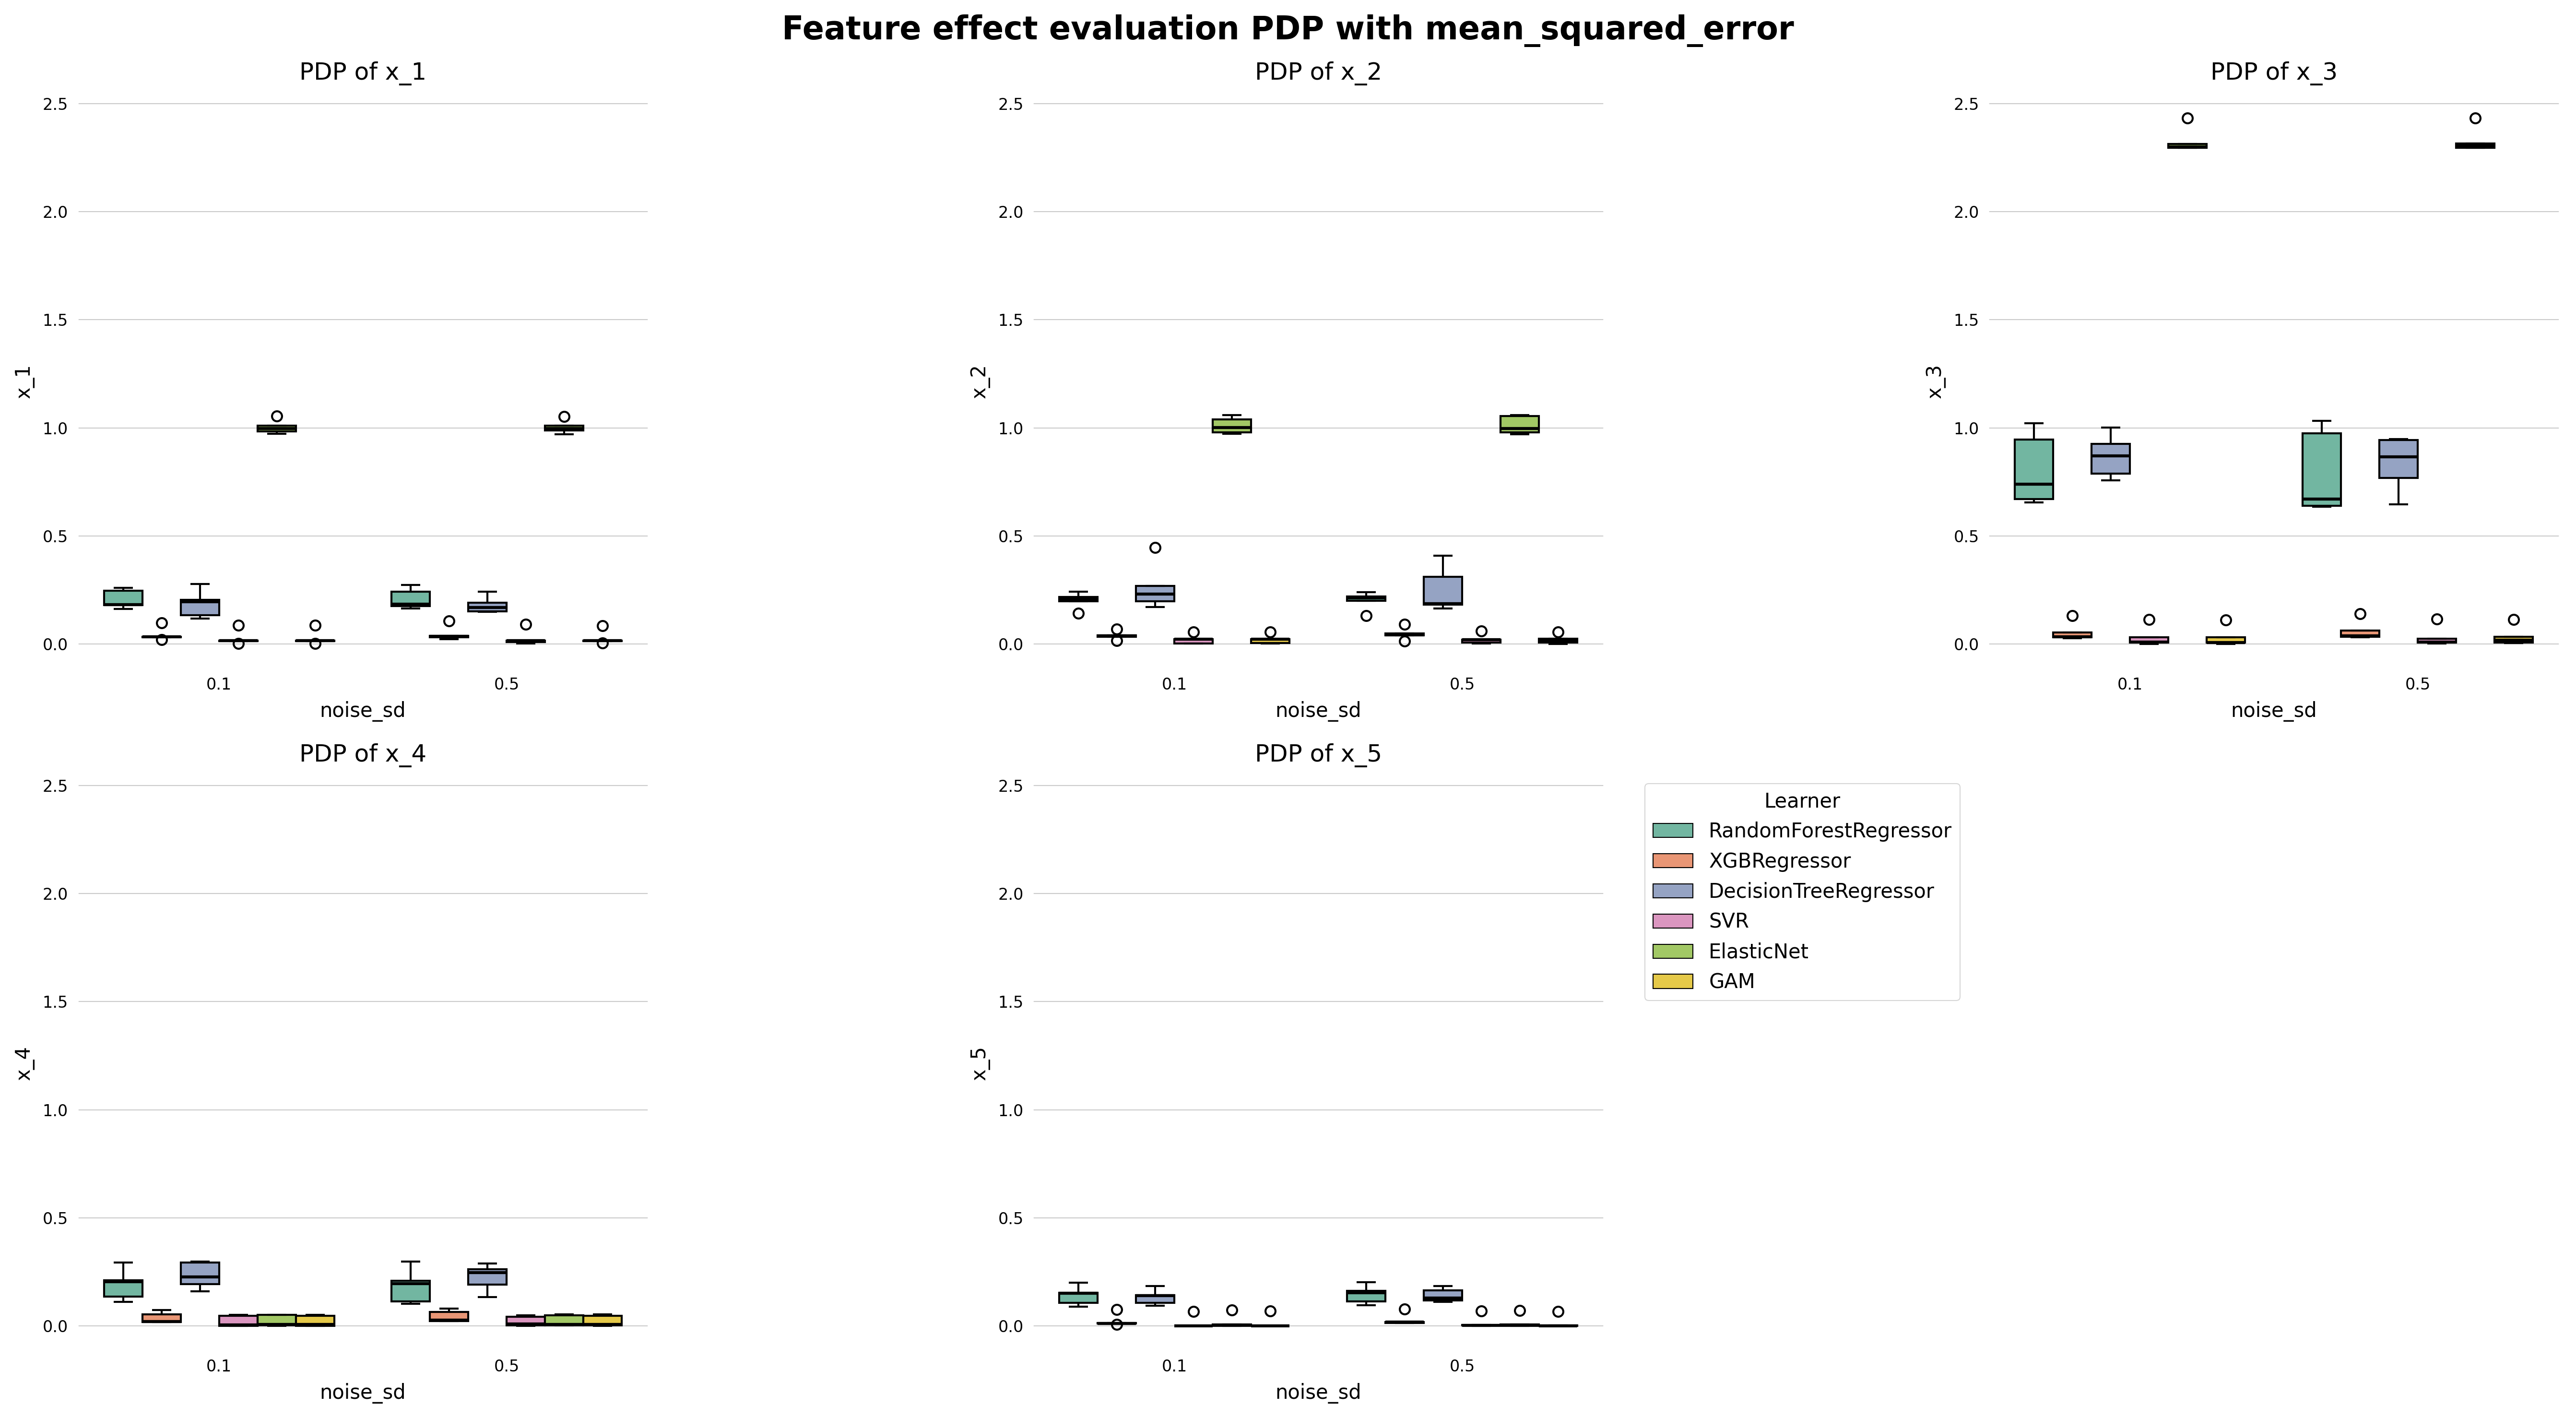

In [5]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="PDP");

### PDP example visualizations

In [6]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={noise_sd})")

(simulation no. 1 with n_train=1000 and noise_sd=0.1)

In [7]:
# recreate dataset
X_train, y_train, X_test, y_test = generate_data(1000, 1000, 0.1, seed=1)
# init groundtruth
groundtruth = Groundtruth()
# load models
rf = load(f'../models/RandomForestRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
xgb = load(f'../models/XGBRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
tree = load(f'../models/DecisionTreeRegressor_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
svm = load(f'../models/SVR_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
elasticnet = load(f'../models/ElasticNet_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')
gam = load(f'../models/GAM_{data_str}_{sim_no}_{n_train}_{noise_sd}.joblib')

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


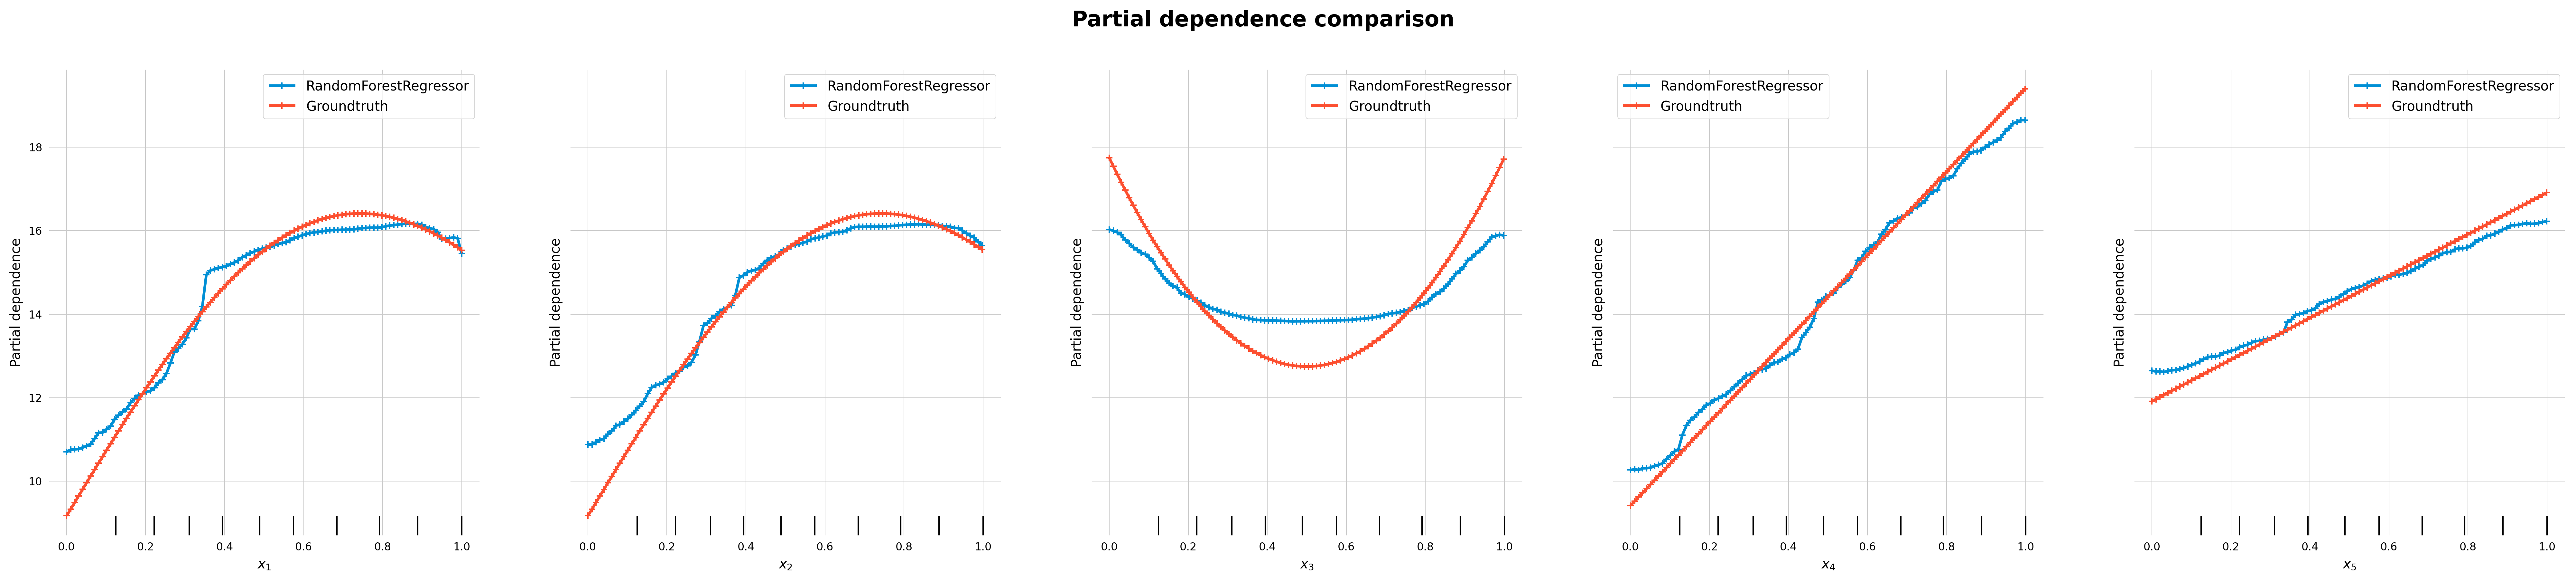

In [11]:
%matplotlib inline
plot_effect_comparison(rf, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

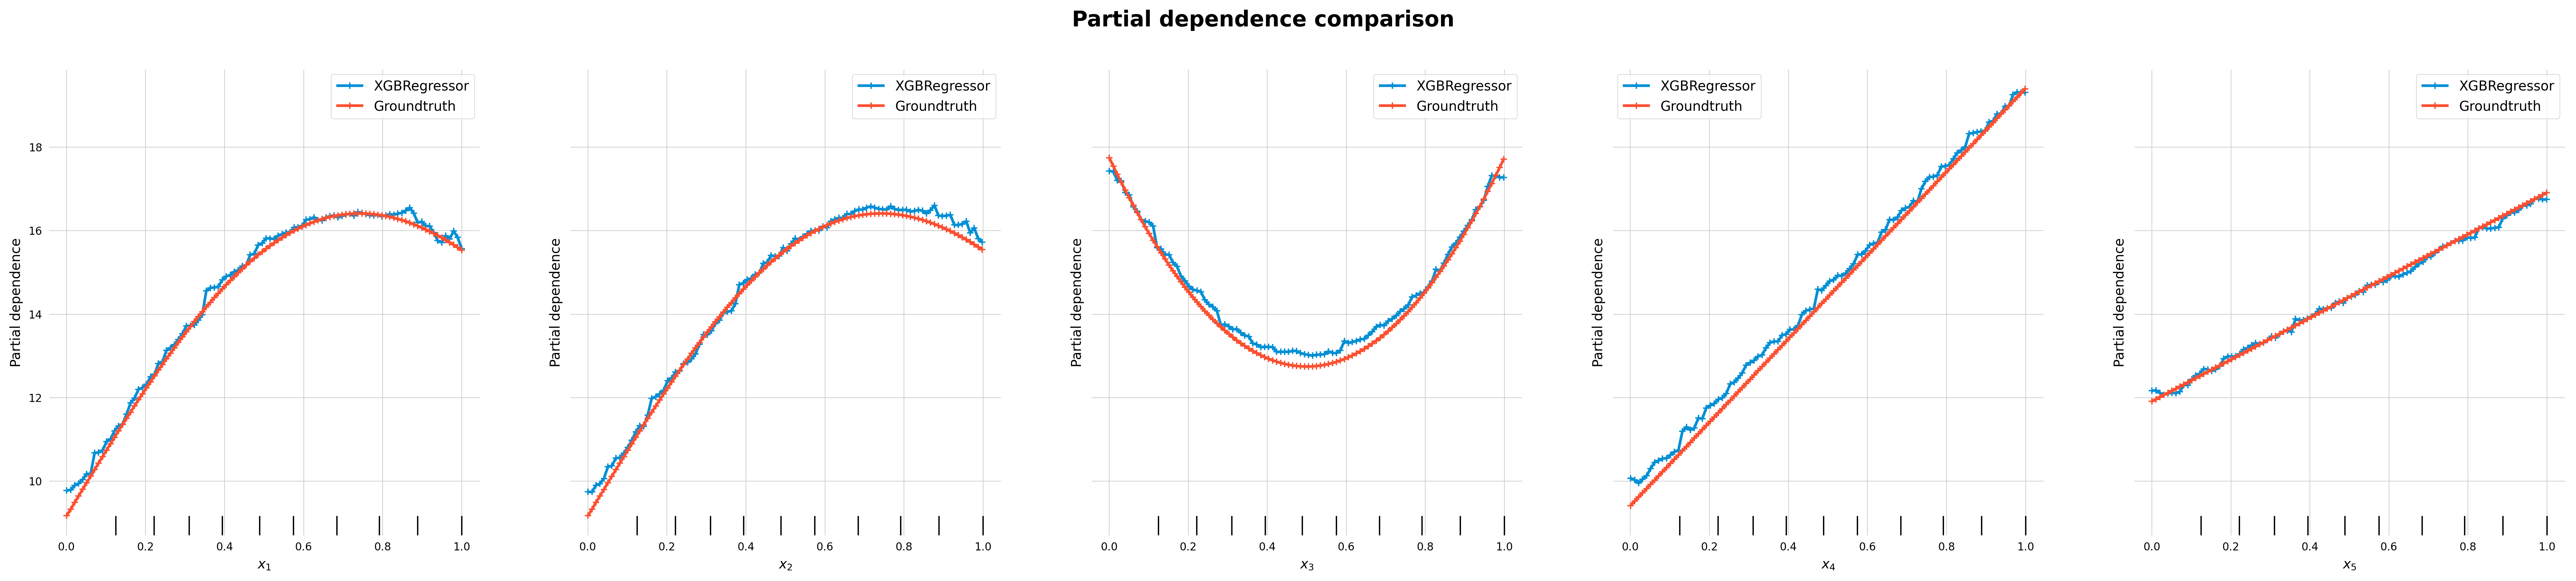

In [12]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

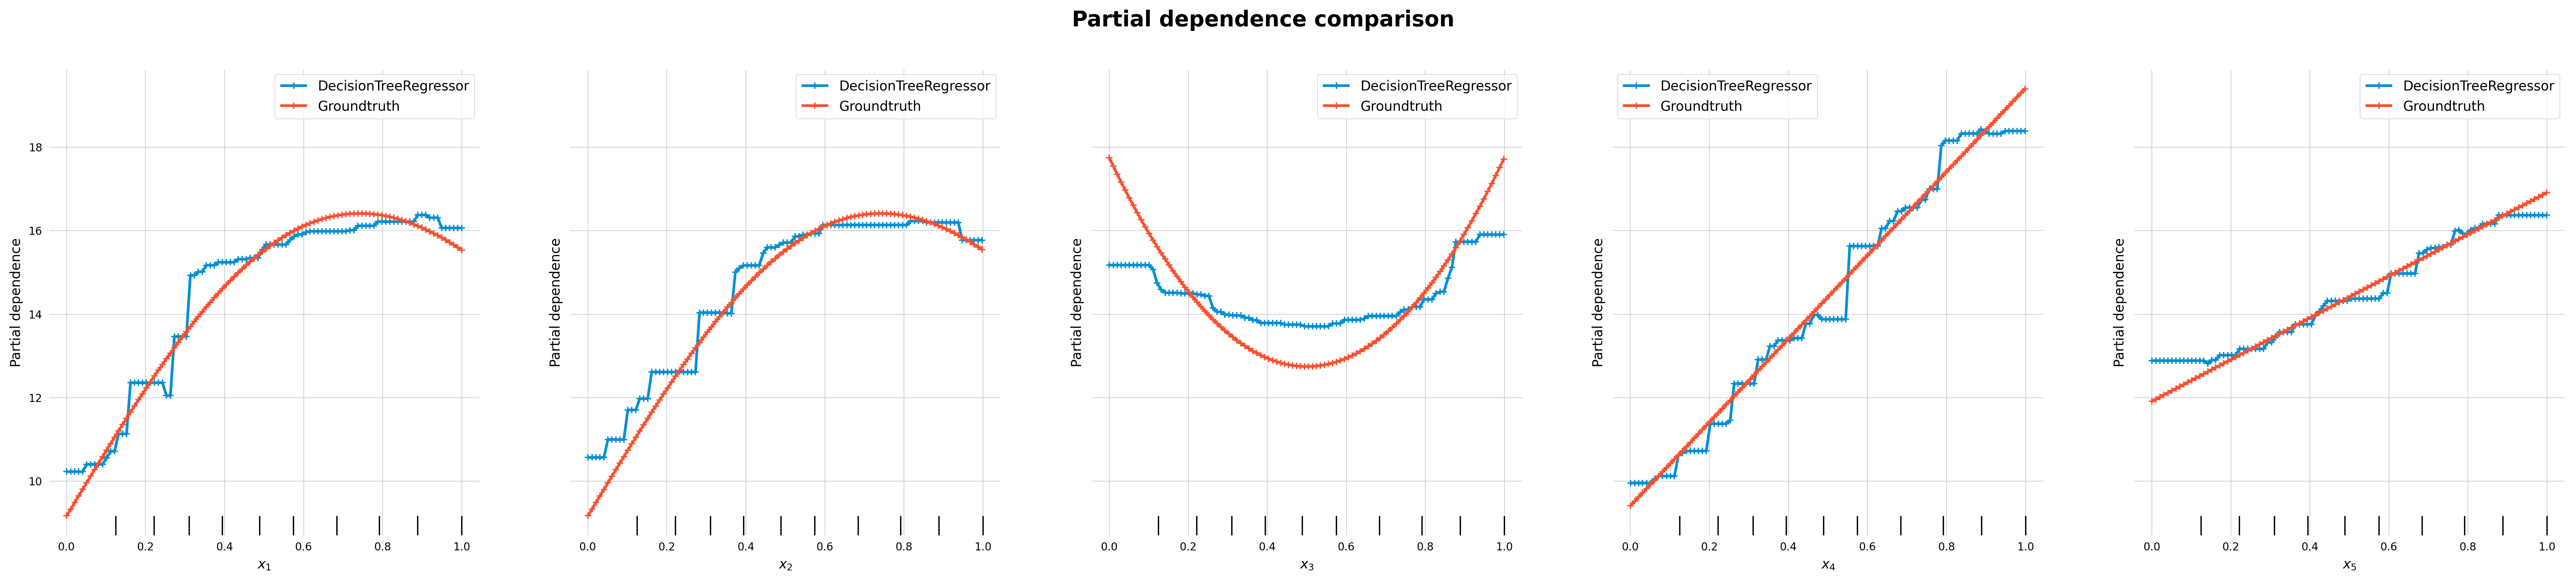

In [13]:
%matplotlib inline
plot_effect_comparison(tree, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

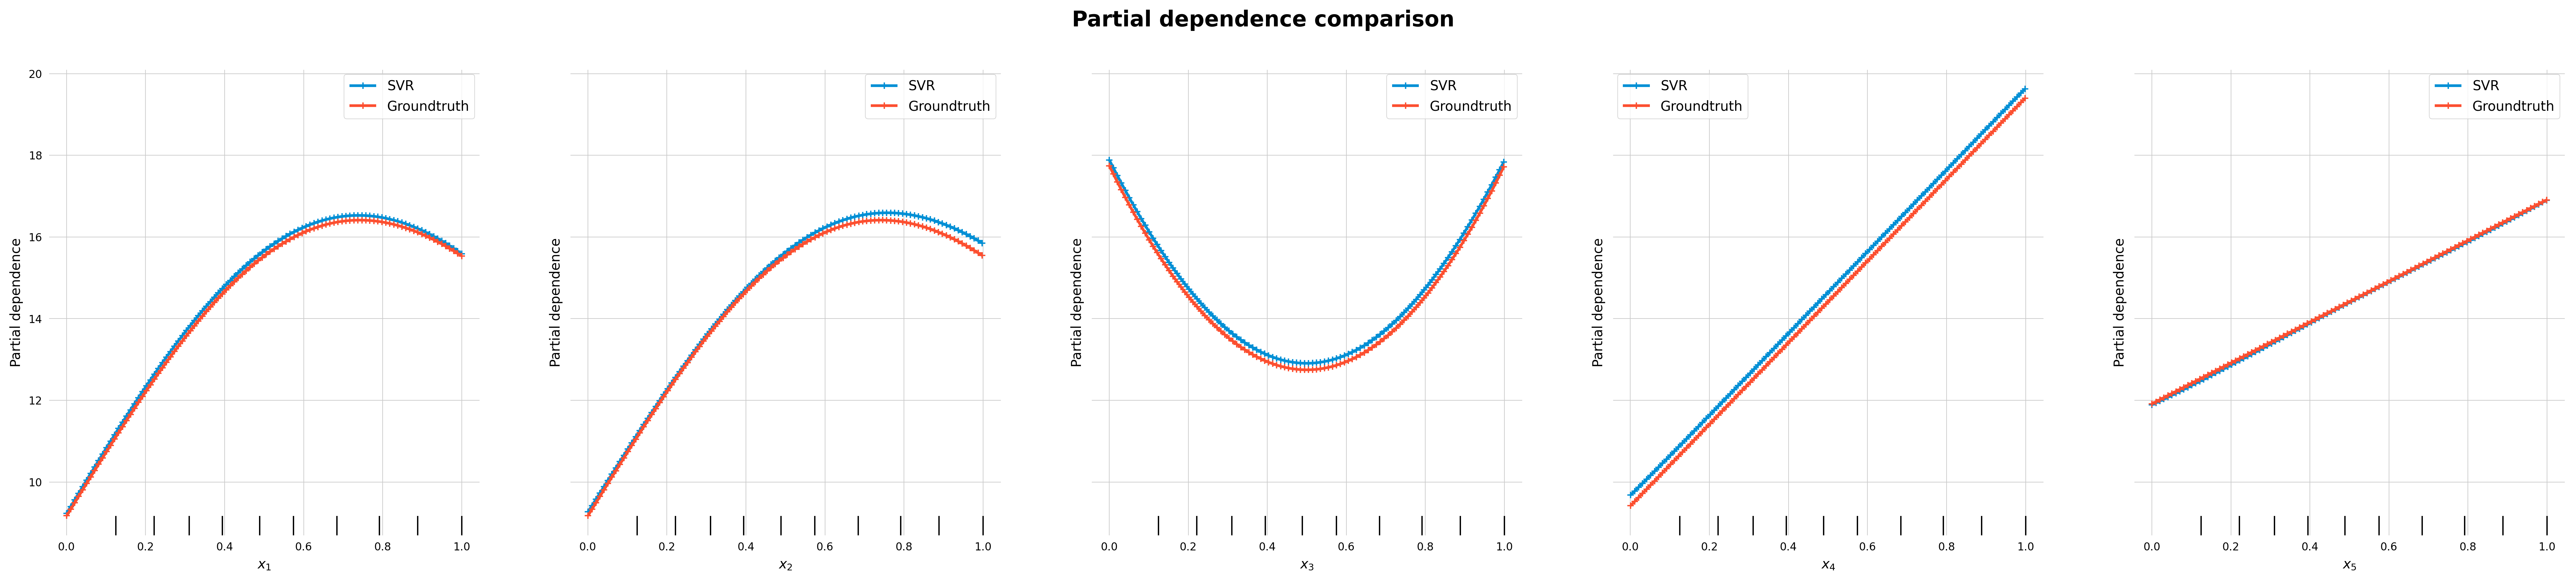

In [17]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

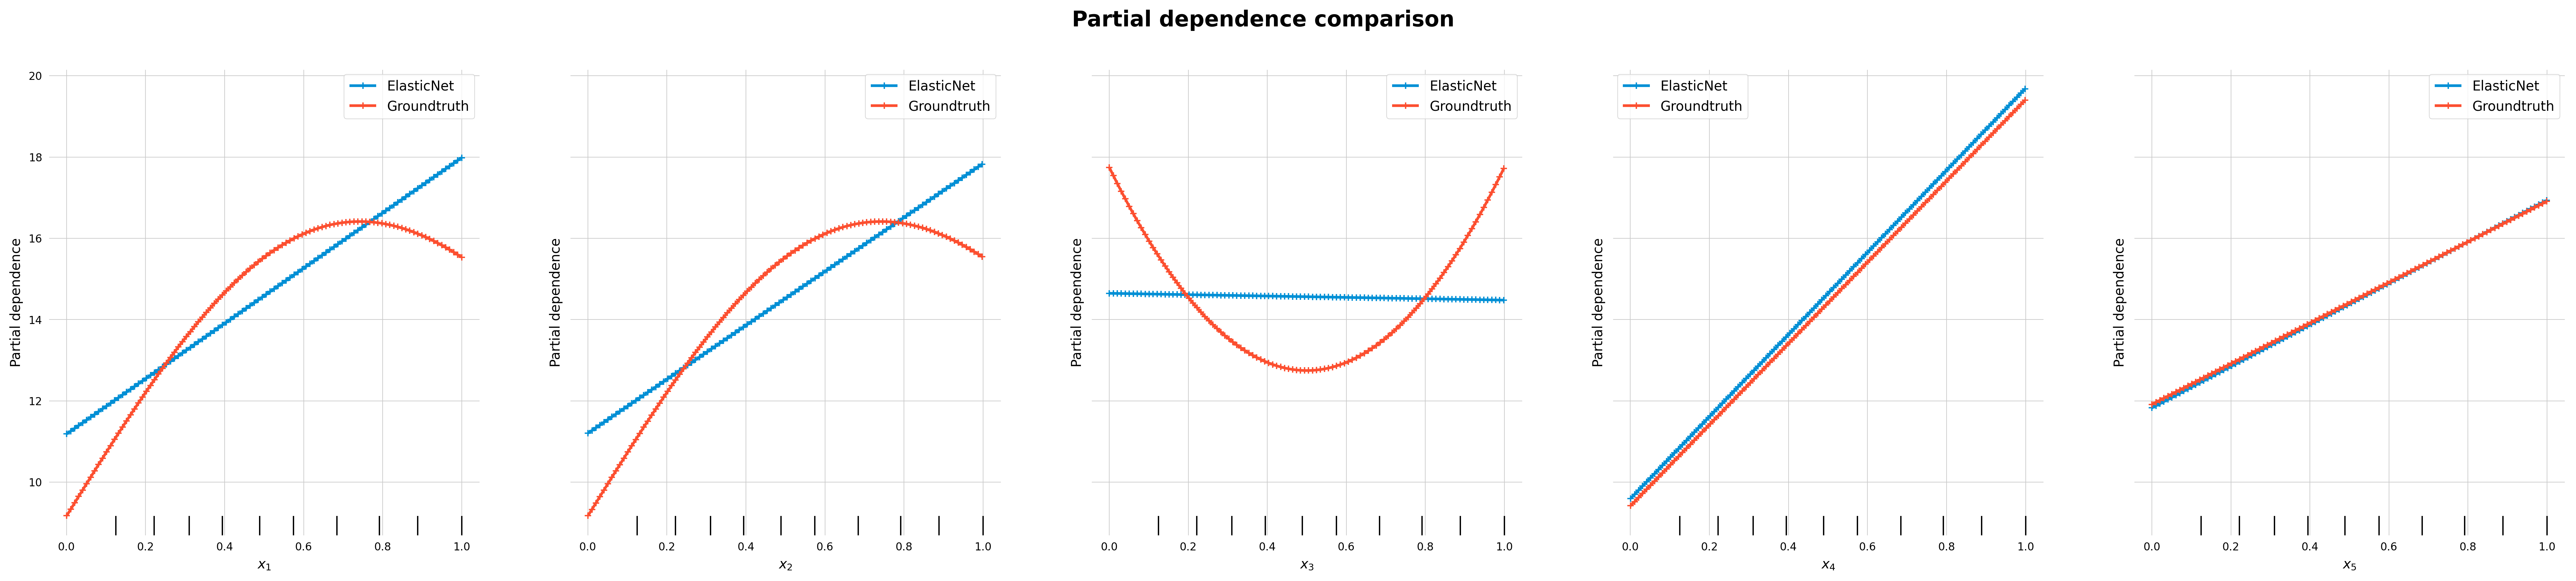

In [15]:
%matplotlib inline
plot_effect_comparison(elasticnet, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

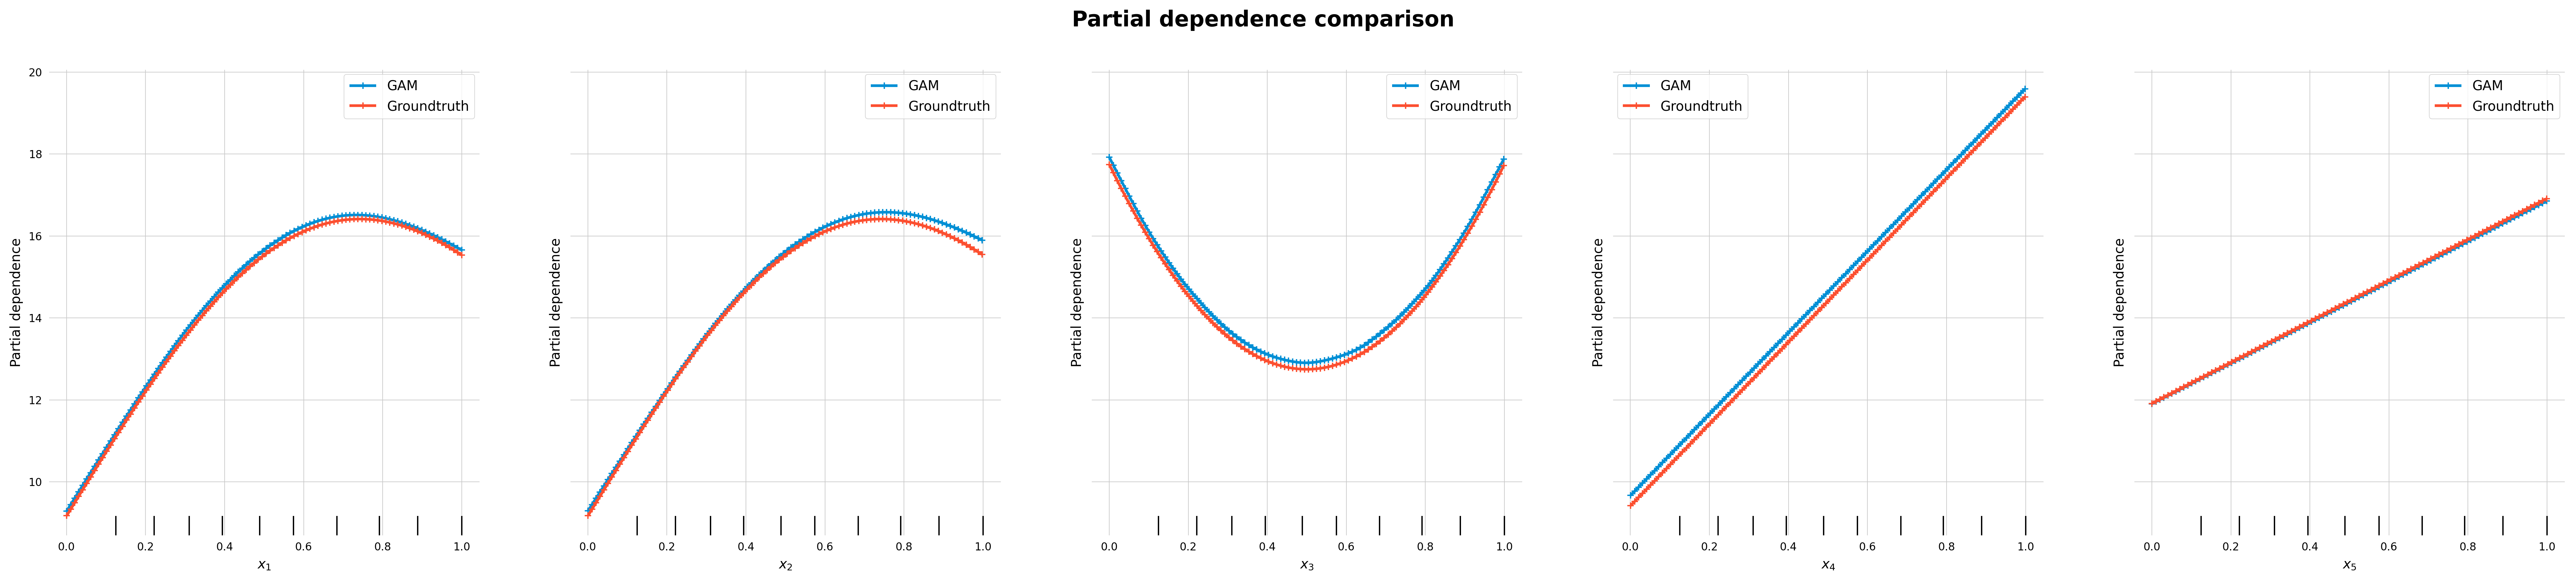

In [16]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="PDP", features=['x_1', "x_2", "x_3", "x_4", "x_5"], groundtruth_feature_effect="theoretical", config=config);

## ALE

### Error of Model-ALE compared to groundtruth-ALE

In [ ]:
effects_results_storage = config.get("storage", "effects_results")
df = pd.read_sql_table("ale_results", f"sqlite:///..{effects_results_storage}")
df

In [ ]:
%matplotlib inline
boxplot_feature_effect_results(features=["x_1", "x_2", "x_3", "x_4", "x_5"], df=df, effect_type="ALE");

### ALE example visualizations

In [ ]:
md(f"(simulation no. {sim_no} with n_train={n_train} and noise_sd={noise_sd})")

In [ ]:
%matplotlib inline
plot_effect_comparison(rf, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(xgb, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(tree, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(svm, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(elasticnet, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);

In [ ]:
%matplotlib inline
plot_effect_comparison(gam, groundtruth, X_train, effect="ALE", features=['x_1', "x_2", "x_3", "x_4", "x_5"], config=config);